## How fast is your Computing Machine?

Our computers do basically two things, one is storing numbers, the other is doing mathematical operations on them. They are so useful because they do these things extraordinarily fast and extraordinarily well, in the sense that they always do it correctly following our instructions. For this reason the main way in which we use them is to give them repetitive instructions for up to billions of times.

Since the speed of the CPU has duplicated ever 1.5 years until few years ago (Moore’s Law), we may have lost track of how really fast is the computer in our hands. When starting this journey into numerical modeling, it is important to first quickly experiment this and realize how remarkably fast it really is, but also to perceive its limits when we reach it.

In this chapter, we start using iPython because its interactive setting allows us feeling better what the computer does. Later we will step into writing and running a program. Let us initially load NumPy:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# this function simply counts from 0 to max
def count(max):
    i=0
    while i<max:
        i=i+1


In [2]:
%timeit count(100000)

6.36 ms ± 81.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [3]:
%timeit count(1000000)

62.2 ms ± 680 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [4]:
%timeit count(10000000)

639 ms ± 9.16 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [5]:
# also this function counts, but increasingly larger numbers
def addCount(max):
    a=0.0
    for i in range(max):
        a=a+i
    #print(a)

When I try to launch count(1000) or count(100000) on my laptop I simply do not observe any difference. Just the time to call the function, and I get the result. It is unnoticeable that the second call required 100 times more calculation than the first one. Only when I arrive at one million or better ten millions, I finally observe a lag. In fact what I notice is the time that it takes to one processor of my laptop for this serial calculation. You can test yours and perceive the power of your computer.

We can be also more quantitative about the time required by our little routine. iPython offers a very simple and powerful magic command called %timeit. Let us test it for testing the time required by our loop:

In [6]:
%timeit addCount(100000)

6.56 ms ± 97.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [7]:
%timeit addCount(1000000)

65.6 ms ± 1.05 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [8]:
%timeit addCount(10000000)

655 ms ± 9.48 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)



Let's focus the Numerical Tools of Python. Among others, NumPy adds to standard Python the following features:
    A. Multidimensional vectorized arrays
    B. Mathematical functions operating on an array or portions of it
    C. Linear Algebra, Fourier development, Random Functions
    D. Input/Output functions to efficiently create and read memory mapped files

### NumPy Types

Without any further specification, Python automatically uses float type machine precision. We might not know which precision this is, in which case it is important to discover it. A very straightforward way to discover the precision of our machine is by testing for which small ε, a and a + ε become indistinguishable. We can do so by iteratively decreasing ε of a certain ratio:

In [9]:
epsilon, ratio = 1.0, 9.0 
while (epsilon):
    print('Precision:',epsilon) 
    epsilon /= ratio

Precision: 1.0
Precision: 0.1111111111111111
Precision: 0.012345679012345678
Precision: 0.0013717421124828531
Precision: 0.00015241579027587256
Precision: 1.6935087808430286e-05
Precision: 1.8816764231589206e-06
Precision: 2.0907515812876894e-07
Precision: 2.323057312541877e-08
Precision: 2.5811747917131966e-09
Precision: 2.867971990792441e-10
Precision: 3.1866355453249343e-11
Precision: 3.5407061614721493e-12
Precision: 3.934117957191277e-13
Precision: 4.371242174656974e-14
Precision: 4.85693574961886e-15
Precision: 5.396595277354289e-16
Precision: 5.996216974838099e-17
Precision: 6.6624633053756655e-18
Precision: 7.402737005972962e-19
Precision: 8.225263339969957e-20
Precision: 9.139181488855508e-21
Precision: 1.0154646098728343e-21
Precision: 1.1282940109698158e-22
Precision: 1.2536600121886843e-23
Precision: 1.392955569098538e-24
Precision: 1.5477284101094868e-25
Precision: 1.7196982334549854e-26
Precision: 1.9107758149499837e-27
Precision: 2.1230842388333153e-28
Precision: 2.35898

The last line indicates that the precision that standard Python assumes on my machine is 10^{−324}. This is indeed associated to a 64-bit float number. One can verify this by setting a smaller precision in the first line of this sequence. Setting initially:

In [10]:
epsilon, ratio =  np.float16(1), np.float32(9)
while (epsilon):
    print('Precision:',epsilon) 
    epsilon /= ratio


Precision: 1.0
Precision: 0.111111
Precision: 0.0123457
Precision: 0.00137174
Precision: 0.000152416
Precision: 1.69351e-05
Precision: 1.88168e-06
Precision: 2.09075e-07
Precision: 2.32306e-08
Precision: 2.58117e-09
Precision: 2.86797e-10
Precision: 3.18664e-11
Precision: 3.54071e-12
Precision: 3.93412e-13
Precision: 4.37124e-14
Precision: 4.85694e-15
Precision: 5.3966e-16
Precision: 5.99622e-17
Precision: 6.66246e-18
Precision: 7.40274e-19
Precision: 8.22526e-20
Precision: 9.13918e-21
Precision: 1.01546e-21
Precision: 1.12829e-22
Precision: 1.25366e-23
Precision: 1.39296e-24
Precision: 1.54773e-25
Precision: 1.7197e-26
Precision: 1.91078e-27
Precision: 2.12308e-28
Precision: 2.35898e-29
Precision: 2.62109e-30
Precision: 2.91232e-31
Precision: 3.23592e-32
Precision: 3.59546e-33
Precision: 3.99496e-34
Precision: 4.43884e-35
Precision: 4.93205e-36
Precision: 5.48005e-37
Precision: 6.08895e-38
Precision: 6.7655e-39
Precision: 7.51722e-40
Precision: 8.35244e-41
Precision: 9.2808e-42
Precis

Similarly to float, there exist integers with several precisions: np.int32, np.int64, np.int128. The type of every NumPy variable can be    retrieved the dtype, e.g., eps.dtype.

It is very important to keep in mind the importance of precision. All the mathematical routines implemented in Python, as well as in any other language, follow the standards determined by IEEE which imply that they are all corrected to the last digit. Therefore, when we will model a physical system we can be sure that errors will not propagate quickly to lower digits with every algorithm that does not explicitly remove this information.

## ndarrays

Let us start looking at the vectorized arrays. The core of NumPy is the object called ndarray, a storage of large quantities of data that allows to operate fast and flexible operations on it. Let’s look at some basic examples using iPython again and create a matrix (a two-dimensional array) of two rows and three columns:


In [11]:
firstArr = np.array([[4,6,3,4],[2,3,6,0]], dtype=np.int8)
firstArr.dtype

dtype('int8')

In [12]:
firstArr.ndim # number of dimensions

2

In [13]:
firstArr.shape # array shape as (rows,columns)

(2, 4)

In [14]:
firstArr.dtype # Out[10]: dtype(’int64’)

dtype('int8')

What we find is that NumPy, if given a certain set of data, automatically decides a type (generally integer or float) and defines an array of the right shape where to store them. Given a NumPy array, it is always possible to obtain its shape and data type (dtype). The main difference between ndarrays and Python data types is that the elements of ndarrays are all of a predefined and homogeneous type, which is one of the reasons for the speed of its calculations.

In general, one can set the data type at the moment of creation of the array, which is a particularly useful function when one has to handle very large models and datasets and needs to be in control of the size of the occupied memory. Data in NumPy are either int: integer, uint: unsigned integer (from 0), and float, a real number. int and uint can have sizes of 8, 16, 32, and 64 bits, while float of 16, 32, and 64 bits. If not otherwise set, automatically NumPy will set data type size to 64 bits.

Most commonly used generators of ndarrays are arange, zeros and ones. Let us look at some examples:

In [15]:
secondArr = np.arange((20),dtype=np.int32)
secondArr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19], dtype=int32)

In [16]:
secondArr.dtype

dtype('int32')

In [17]:
In [14]: secondArr = np.zeros(20)
In [15]: secondArr

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [18]:
In [16]: secondArr.dtype

dtype('float64')

In [19]:
In [17]: secondArr = np.ones(20)
In [18]: secondArr

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [20]:
In [19]: secondArr.dtype

dtype('float64')

arange is the analogue of range in Python, but it creates a NumPy array of 64 bits integers. zeros and ones instead create arrays of 64 bits float. ones can also be created by zeros using the broadcasting properties of NumPy arrays, just by the instruction arr=np.zeros(20)+1.0. If we wish to create arrays with different types, for example due to operational reasons or of memory size, dtypes can be explicitly specified, 
e.g.,arr = np.arange(20, dtype=’float32’) or arr = np.ones(20, dtype=’int8’).

Let us now check how using NumPy allows to speed the calculations of the prior section. The first temptation might be to simply to replace range with np.arange.

In [21]:
def addCountNP(max):
    a=0
    for i in np.arange(max):
        a=a+i
    #print(a)

In [22]:
%timeit addCountNP(10000000)

1.21 s ± 350 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [23]:
%timeit addCount(10000000)

655 ms ± 9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


What happened here is that although the arrays were ndarrays, the operation was done as for a standard Python list. The trick to speed calculations on ndarrays is to use the broadcast vectorized version of each operation. Let us look at how to add two ndarrays of one million of integers either with the standard Python loop and exploiting the NumPy broadcasting capabilities:

In [24]:
def addArray(a,b):
    c=np.zeros(a.size)
    for i in np.arange(a.size):
        c[i]=a[i]+b[i]
    return(c)

a=np.arange(1000000)
b=np.arange(1000000)

In [25]:
%timeit c=addArray(a,b) #standard python 

657 ms ± 481 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [26]:
%timeit c=a+b #NumPy arrays broadcasting 

2.45 ms ± 1.56 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


A gain of two orders of magnitude! To use the broadcasting feature of NumPy makes Python’s speed comparable to compiled codes such as C, but with the obvious huge gain in terms for code development, testing, and readability. Broadcasting is clearly not limited to the addition operation, but it works as well with all the other arithmetic operations such as c=a*b; c=a/b; c=a-b,as well as scalar-array operations like 
```python 
c=1/a; 
c=a**0.5
```
Besides operations on two arrays, there are numerous unary (and binary universal functions that can be used with NumPy arrays. Among unary functions, much used ones are 
```python 
np.abs()
np.sqrt()
np.exp()
np.log()
np.sign()
```
and all the trigonometric functions. Binary functions are 
```python 
np.add()
np.multiply()
np.power()
np.maximum()
np.mod().
```
Let us go back now to the initial problem. We wanted to sum all the elements of a large array (100 millions numbers). This is neither an unary or binary operation, because it is a function that projects an array into one number, the sum. The most common among these operations are already efficiently implemented in NumPy. For example, the sum is immediately obtained by:

In [27]:
import numpy as np
%timeit np.arange(10000000).sum()

38.3 ms ± 10.4 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [28]:
x=np.random.rand(1001)
print(x)
g=1
for y in x:
     g = g*y
print (g)



[ 0.10048771  0.36563131  0.13362572 ...,  0.30150524  0.74721818
  0.35012432]
0.0


These operation have been in fact written in Cython, which is a C compiled operation. We will see later in this chapter how such operations, when not already implemented in NumPy, can be easily created using Cython.

## Indexing and Slicing

Most languages today are compiled. One of the great features of compilers is that when we have to perform a set of repetitive operations on a large set of data the compiler will take care to optimize these iterations in an exceptional way, even if we wrote a very confusing code. This is not the case with an interpreted software like Python.

If we want our Python code to run fast, we have to organize the sequence of operation in a smart way. In particular a very common case like calling an **if** command inside a for loop can make Python very slow. We have seen above how looping makes Python slow. One of the secrets that makes Python fast is to use smart indexing. To use indexing in practice in this case means to vectorize the command **if** and then to use these indexes to selectively operate on arrays. This might seem a terrible setback for Python programmers, however the great advantage of forcing the developer to do this operation is that the program will be written in a completely vectorized way from the start, therefore ready to be parallelized.

Indexing and slicing in NumPy is a long topic, whose full coverage goes beyond the scopes of this book. To gain a full understanding of the possibilities offered by NumPy I recommend to follow one of the online free tutorials (e.g., https://docs.scipy.org/doc/numpy-dev/user/basics.indexing.html). I will cover here some main the features that we will use more often in this book, and explain in depth some important details on the memory management associated to ndarrays.

Let us now dive into the main features that interest us. Given an array, e.g., **arr**, we can access the element n with square brackets **arr[n]** and we can slice the array extracting the elements between n and m with the command **arr[n:m]**, which will return m − n elements (comprising **arr[n]** and excluding **arr[m]**. It is very important to understand that even if we associate a name to the slice of arr, this is only a view, not a new array implying that the m − n elements are not copied in a new allocated chunk of memory. This means that by changing the sliced array you will change the initial data. Let us look at an example to clearly understand how this works:

In [29]:
secondArr=np.arange(20)
secondArr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [30]:
sliceArr = secondArr[4:10]
superslicearray = sliceArr
sliceArr

array([4, 5, 6, 7, 8, 9])

In [31]:
superslicearray[3]=100000
sliceArr

array([     4,      5,      6, 100000,      8,      9])

In [32]:
secondArr

array([     0,      1,      2,      3,      4,      5,      6, 100000,
            8,      9,     10,     11,     12,     13,     14,     15,
           16,     17,     18,     19])

Who is familiar with other languages might be surprised by this behavior, and believe that when defining sliceArr Python should have copied the subset of second **Arr** data into a new array. The point is that NumPy has been designed to deal with very large datasets or numerical models, therefore it uses a policy of minimization of memory usage. For this reason, if one does not force NumPy to create a copy of the sliced data, it will simply generate a view of the already existing array. NumPy can be forced to create a separate new array by adding **.copy()** to the slice, e.g., in our case **sliceArr = secondArr[4:10].copy()**.

Slicing is very flexible and allows omitting, for example, the first index (e.g., **arr[:10]**) or the last index (e.g., **arr[10:]**) of a slice, which implies that the slice reaches the end of the array. It is also possible to slice the array every k elements by indicating a third parameter in the slice (e.g., **arr[4:12:3]**), and also omitting the other parameters (e.g., **arr[::3]**). Negative indexes are also admitted, which means that counting starts from the last element, backward, for example:

In [33]:
secondArr[10:-5]

array([10, 11, 12, 13, 14])

#### N-Dimensional Indexing
Indexing and slicing in more dimensions are just a recursive repetition of one-dimensional operations. In 2D, for example, arrays can be indexed either as **arr2d[n][m]** or, with the same effect, as **arr2d[n,m]**. The first index refers to the inner array, the second index to the outer array. For example,

In [34]:
arr2d = np.arange(20)
sliceArr = arr2d[4:10]
arr2d=arr2d.reshape((5,4))
arr2d

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [35]:
sliceArr

array([4, 5, 6, 7, 8, 9])

In [36]:
sliceArr[3]=100
arr2d

array([[  0,   1,   2,   3],
       [  4,   5,   6, 100],
       [  8,   9,  10,  11],
       [ 12,  13,  14,  15],
       [ 16,  17,  18,  19]])

In [37]:
secondArr[4*2+3]

11

It is very important to remember that the reshape command does not create a copy of the data, as well as slicing. The data remain stored in the memory as a one-dimensional array, regardless of the dimensions and shape of the array. The way in which this is done and how NumPy broadcasting operations remain extremely efficient is explained later, where strides are illustrated. Also a book that analyzes in greater detail how Python can deal with data is McKinney,W.(2012) Python for data analysis. Newton: O’Reilly.

### Boolean Indexing

Boolean indexing is the fastest and efficient way to select, access and operate on subsets of a NumPy arrays. Let us for example create a random 5 × 5 matrix (array) and select only the positive elements:

In [38]:
arr2d = np.random.randn(5,5)
arr2d

array([[-0.22099398, -0.14879075, -1.19395346, -0.57670602,  0.64556606],
       [ 0.32079202, -0.01872761,  0.96515051, -0.82389689, -1.10377444],
       [ 0.00323964, -0.31459612,  0.47434386,  0.75628592,  1.3449736 ],
       [-0.16521876, -0.31568834, -0.12364073,  0.70611395,  1.04736252],
       [-0.59991713,  0.05634265,  1.14699918,  0.3175479 ,  0.46771736]])

In [39]:
arr2d>0

array([[False, False, False, False,  True],
       [ True, False,  True, False, False],
       [ True, False,  True,  True,  True],
       [False, False, False,  True,  True],
       [False,  True,  True,  True,  True]], dtype=bool)

In [40]:
arr2d[arr2d>0]

array([ 0.64556606,  0.32079202,  0.96515051,  0.00323964,  0.47434386,
        0.75628592,  1.3449736 ,  0.70611395,  1.04736252,  0.05634265,
        1.14699918,  0.3175479 ,  0.46771736])

What we did was to create a 5×5 array whose values were True when the elements were positive, and False in the opposite case. It was then possible to select only those elements. It is important to notice that the extracted elements have lost their 5 × 5 structure. This again results from the fact that Python stores every array, regardless of its shape, as a 1D array.

This technique is normally used to operate on a certain subset of an array. For example if we desire to set to 0 all the negative elements of the above array, we can do it with one instruction:

In [41]:
arr2d[arr2d<0]=0
arr2d

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.64556606],
       [ 0.32079202,  0.        ,  0.96515051,  0.        ,  0.        ],
       [ 0.00323964,  0.        ,  0.47434386,  0.75628592,  1.3449736 ],
       [ 0.        ,  0.        ,  0.        ,  0.70611395,  1.04736252],
       [ 0.        ,  0.05634265,  1.14699918,  0.3175479 ,  0.46771736]])

It is important to emphasize that besides compactness and elegance, this technique guarantees an enormous gain in speed. To quantify this advantage, we can compare the time necessary for a standard Python for loop with the Boolean indexing tool described above for a large 2000 × 2000 random array:

In [42]:
arr2d=np.random.randn(2000,2000)

In [43]:
def setNegativeValuesToZero(n,m,a): 
    for i in np.arange(n):
        for j in np.arange(m):
            if a[i,j]<0:
                a[i,j]=0
%timeit -n1 -r1 setNegativeValuesToZero(2000,2000,arr2d)


3.07 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [44]:
arr2d = np.random.randn(2000,2000)
%timeit -n1 -r1 arr2d[arr2d<0]=0

32.9 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


Again, we observe a gain of 2 orders of magnitude by using the NumPy indexing compared to standard Python loops. The message is now loud and clear: never use Python loops for large datasets and large numerical models, but always employ Python indexing/slicing features to achieve compiled code performance for speed and memory management. When not possible, rely on Cython, that we will study soon.

### Transposing and Axis Rotation

We already encountered the function reshape, which allows to project a 1D array as a generic n-dimensional array. One operation that cannot be achieved by reshaping is however transposing, which corresponds to swapping axis. This is a very important function when operating on 2D and 3D numerical modeling, but it is also simply essential in order to calculate the inner product. For example, to calculate Xtranspose * X , one writes:

In [45]:
n=10
arr2d = np.random.randn(n)
arr2d
arr2d=arr2d.reshape(5,int(n/5))
arr2d

array([[-1.2046353 ,  0.85770689],
       [-0.21520824, -1.2484946 ],
       [ 1.04964441, -0.6121175 ],
       [-0.3866603 , -0.17058125],
       [-0.35273257, -1.26729852]])

In [46]:
arr2d.T
np.dot(arr2d.T,arr2d)


array([[ 2.87314064, -0.89406894],
       [-0.89406894,  4.30423122]])

In [47]:
np.linalg.norm(arr2d[:,0])**2


2.8731406445538541

Transposing, however, is not limited to swapping x and y axis. One can rotate axis as well. For example in 3D:

In [48]:
arr3d = np.arange(2*3*4).reshape(2,3,4)
arr3d

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [49]:
arr3d2 = arr3d.transpose((2,0,1)).copy()
print(arr3d.shape)
print(arr3d2.shape)
arr3d[1,0,0]=1000
arr3d2

(2, 3, 4)
(4, 2, 3)


array([[[ 0,  4,  8],
        [12, 16, 20]],

       [[ 1,  5,  9],
        [13, 17, 21]],

       [[ 2,  6, 10],
        [14, 18, 22]],

       [[ 3,  7, 11],
        [15, 19, 23]]])

Transposing, as well as reshaping, is just a specific view of the entire array, therefore transposing will not create a new set of data, and when modifying the transposed of an array, one modifies the original array as well.

## Strides

The technical details given here help to understand how NumPy deals with very large arrays minimizing memory occupation and maximizing access speed.

It is important to emphasize that although an array can have many dimensions, the memory in our computer is structured in a purely sequential way, therefore ultimately the real structure of the array is one-dimensional, and every n-dimensional array will only be a specific view on that 1D array.

NumPy is extraordinary powerful in managing n-dimensional arrays, different views, complex subsets, for example

```python
arr[arr*arr<1]. ```

This power is based on the ability to directly address chunks of data by striding across the
memory and zooming into small blocks of memory. For example, let us take a random 100 × 100 × 100 array of np.float64 data, equivalent to a 1D array of one million elements, occupying 8 bytes each. A block within the array can be extracted in microseconds, almost regardless to the size of the block:

In [50]:
np.random.randn(100,100,100)

array([[[ 1.18724565, -1.17847098, -0.17901848, ...,  0.31548821,
          1.52386289,  1.30550334],
        [ 0.03921961, -1.14513095,  1.08349513, ..., -0.91107397,
          0.5990501 , -0.0095132 ],
        [-1.03494619, -0.34494331,  1.3066751 , ...,  0.44352633,
         -2.02974536, -0.41618236],
        ..., 
        [ 0.18847539, -0.32793023, -0.06932623, ..., -1.43874036,
         -0.05679142,  1.04636072],
        [ 0.64027859, -0.15175745, -0.3156143 , ...,  1.00759914,
         -0.29944952, -0.2369739 ],
        [-1.2539037 , -2.43883094,  0.81398595, ..., -0.48610907,
         -0.51769285,  0.10317585]],

       [[ 1.69603699,  1.00736172,  0.10801974, ..., -1.29719681,
         -0.33559794, -0.46042177],
        [-1.4134579 , -0.21276452,  0.81306398, ...,  0.83519248,
          0.32448463,  1.213974  ],
        [-2.53249634, -0.1706863 ,  1.2617902 , ..., -0.64415962,
         -1.01044812,  1.12183039],
        ..., 
        [ 0.43750043, -0.59698592, -0.31926476, ...,

In [51]:
%timeit -n1 -r1 newArray=arr3d[45:55,45:55,45:55].copy() #small block

14.1 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [52]:
%timeit -n1 -r1 newArray2=arr3d[15:85,15:85,15:85].copy() #large block

11.9 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


When we operate on the subset of the array however the operational time increases with the size of the block, although not in a proportional way. For example, to set the values of the subset to zero we need about 20 times more time for a subset that is over 300 times greater:

In [53]:
%timeit -n1 -r1 arr3d[45:55,45:55,45:55]=0 #small block

8.06 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [54]:
%timeit -n1 -r1 arr3d[15:85,15:85,15:85]=0 #large block

7.17 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


NumPy accesses n-dimensional arrays and its slices as fast as one-dimensional arrays. To understand how this is achieved, let us consider, for example an array a of 32000 integers and then create a reshaped three-dimensional 20 × 40 × 40 version assigned to b. In our case a is composed by 64-bit (8 bytes) integers, which means that one needs to proceed 8 bytes forward to access the next element along the first axis. The size of every element can be also in general assessed with a.itemsize:

In [55]:
a=np.arange(32000)
b=a.reshape(20,40,40)

In [56]:
print(a.itemsize,b.itemsize)

8 8


This will be stored in memory in a buffer that contains 32000 ascending integers from 0 to 31999. As we have seen before a and b are stored in the same memory block. The way in which NumPy differentiates how to operate on them is by characterizing them by their different strides. Strides are tuples of bytes to step in each dimension when traversing an array. In practice they are the offset in bytes between an element and the neighboring one in every direction. Strides are shown explicitly using the instruction arr.strides:

In [57]:
print(b.shape,b.strides)
print(8*40,8*40*40)

(20, 40, 40) (12800, 320, 8)
320 12800


In [58]:
a.strides

(8,)

The last number, 8, of the strides refers to the size of each element in the array, i.e., it is always the itemsize. The other numbers refer to the number of bytes forward necessary to access the next element along the other axes. The total number of bytes is called offset and is calculated as offset = sum(indexes * a.strides). For example, for the initial array a[n] every element is accessed at the position 
```python
offset = n*a.strides[0]
```
, while b[i,j,k] is accessed calculating its associated memory offset as 
```python
offset = i*b.strides[0]+j*b.strides[1]+k*b.strides[2]
```
in bytes. To obtain the element location one has to divide by b.itemsize. For example,

In [59]:
b[2,3,4]

3324

In [60]:
(2*b.strides[0]+3*b.strides[1]+4*b.strides[2])/b.itemsize

3324.0

## Vector Product

The inner product, np.dot() in NumPy, is the most common operation between arrays. It is equivalent to the inner product between 1-D arrays or to matrix multiplication between 2D arrays. It is defined on n-dimensional arrays as the sum product over the last axis of the first array and the second-to-last of the second array. For example,

In [61]:
np.dot(np.random.rand(1000),b=np.random.rand(1000))/1000

0.2476189485264719

will give you a number close to 0.25, since np.random.rand() is a uniformly extracted random number between 0 and 1. Similarly

In [62]:
np.dot(np.random.rand(100,100),b=np.random.rand(100,100))/100

array([[ 0.24916199,  0.21980623,  0.23265348, ...,  0.19299233,
         0.22978476,  0.21044342],
       [ 0.2669618 ,  0.23955759,  0.25529797, ...,  0.20856689,
         0.24533665,  0.23089471],
       [ 0.32034683,  0.26741572,  0.2567161 , ...,  0.23115299,
         0.26659589,  0.25110512],
       ..., 
       [ 0.2935968 ,  0.24545271,  0.26713809, ...,  0.2367511 ,
         0.2666687 ,  0.24843038],
       [ 0.2874005 ,  0.25065884,  0.23514158, ...,  0.21083831,
         0.24390513,  0.22585265],
       [ 0.27790006,  0.25558342,  0.24748777, ...,  0.22732223,
         0.25628107,  0.24053523]])

will result in a 100 × 100 matrix of numbers normally distributed around 0.25. 

Outer products are called by np.outer() and are an easy way to create an x, y regular mesh:

In [63]:
a=np.arange(0,11,1)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [64]:
b=np.ones(11)
b

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [65]:
x=np.outer(a,b)
x
x2=np.outer(b,a)
x2
(x-x2)**2

array([[   0.,    1.,    4.,    9.,   16.,   25.,   36.,   49.,   64.,
          81.,  100.],
       [   1.,    0.,    1.,    4.,    9.,   16.,   25.,   36.,   49.,
          64.,   81.],
       [   4.,    1.,    0.,    1.,    4.,    9.,   16.,   25.,   36.,
          49.,   64.],
       [   9.,    4.,    1.,    0.,    1.,    4.,    9.,   16.,   25.,
          36.,   49.],
       [  16.,    9.,    4.,    1.,    0.,    1.,    4.,    9.,   16.,
          25.,   36.],
       [  25.,   16.,    9.,    4.,    1.,    0.,    1.,    4.,    9.,
          16.,   25.],
       [  36.,   25.,   16.,    9.,    4.,    1.,    0.,    1.,    4.,
           9.,   16.],
       [  49.,   36.,   25.,   16.,    9.,    4.,    1.,    0.,    1.,
           4.,    9.],
       [  64.,   49.,   36.,   25.,   16.,    9.,    4.,    1.,    0.,
           1.,    4.],
       [  81.,   64.,   49.,   36.,   25.,   16.,    9.,    4.,    1.,
           0.,    1.],
       [ 100.,   81.,   64.,   49.,   36.,   25.,   16.,    

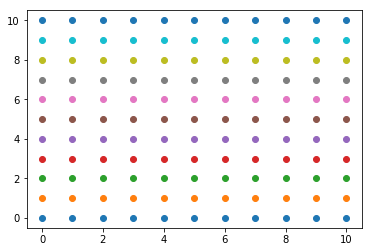

In [66]:



y=np.outer(b,a)
plt.plot(x,y,'o');plt.show()


NumPy allows composing large arrays combining blocks of one array scaled by another. This operation is called Kronecker product, and we will intensively use it to build large operators for two-dimensional continuum mechanics. For example,

In [67]:
np.kron(np.eye(3), np.ones((2,2)))

array([[ 1.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  1.],
       [ 0.,  0.,  0.,  0.,  1.,  1.]])

## Linear Algebra

All the linear algebra tools that we will need are already efficiently implemented through the standard optimized ATLAS LAPACK and BLAS libraries. Ultimately all linear algebra routines expect to operate on a 2-dimensional array. There is also a matrix type in NumPy but its use is discouraged since it is possible to obtain the same result by using arrays only.

Linear algebra has many subprograms that run routines for decompositions such as Cholesky, QR and Singular Value. They can be very important for many problems, however they do not apply for the problems that we will address in this volume. The interested reader can refer to the regularly updated SciPy manual at http://docs.scipy.org/doc/numpy/reference/routines.linalg.html. 

Linear algebra (LA) routines are accessed through the module numpy.linalg:

In [68]:
import numpy.linalg as linalg

An often employed tool is linalg.norm() both for calculating the size of a 1D (vector) and 2D (matrix) arrays. Norm, that is just the square root of the sum of the square of all the elements of a n-dimensional array, could be also calculated by the definition, but the numpy.linalg implementation can be one order of magnitude as more efficient. Let us for example benchmark the calculation of a 100 × 100 array norm:

In [69]:
a=np.arange(-100,101,1)
b=np.arange(201)
x=np.outer(a,b)

x
#normVectorized=np.sqrt(sum(sum(x**2)))
#normVectorizedctorized
print(x.shape)

(201, 201)


In [70]:
%timeit -n 1 -r1 linalg.norm(x)

277 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [71]:
%timeit -n 1 -r1 np.sqrt(sum(sum(x**2)))

342 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


Determinants are often employed in linear algebra because they are related to the invertibility of a matrix, and on whether the associated linear system of equations is solvable (a smaller determinant can indicate that some eigenvalues are close to zero, which makes inversion harder). However, to calculate the determinant of extremely large 2D arrays as we will often do in this volume is computationally so demanding that we will do it only for small problems. Let us calculate the determinant of few random matrices, 10 × 10 and 100 × 100, for example:

In [72]:
dets=np.zeros(10)
for i in np.arange(10): dets[i]=linalg.det(np.random.rand(10,10))
dets

array([-0.05203532, -0.15953656,  0.0205167 ,  0.01746048,  0.03476215,
        0.03132063, -0.00255587, -0.02087137,  0.00216041,  0.00059872])

In [73]:
for i in np.arange(10): dets[i]=linalg.det(np.random.rand(100,100))
dets

array([ -8.65506401e+24,  -2.09022551e+23,  -4.53402053e+24,
        -3.16088830e+24,  -1.23824174e+25,   1.53921226e+24,
        -1.96400623e+25,  -1.67194879e+24,   2.49299685e+25,
         4.48665016e+24])

## Cython

There are situations in which a simple and straightforward NumPy solution does not exist or can be very difficult to implement. We will see some examples in the last, advanced part. When we are in this situation, it is first of all important to verify first whether this lack of vectorization makes our code sensibly slower. Since this is often the case, a powerful solution has been created by the authors of the parts that compose the Python Scientific Environment, which is called Cython.

The most recent updates and documentation for Cython are available at the address cython.org). Cython is based on Pyrex, library that allowed to extend Python with C functions. Recently, however Cython developers went beyond and created an extended language where codes written in Python are optimized and compiled just at the moment of running the Python program. In other words, while the Python language is interpreted, the computer will on-the-fly compile the parts of your code written in Python in special Cython files. Still they will be written in Python, which means that the user does not need to learn a new, more challenging language, such as C. The result is a superior language, only slightly more complex than Python, that combines the best of the two worlds, C and Python.

The main addition of Python to Cython are static variables. These are variables for which type and space in memory is predefined by the programmer. The advantage of using them is that the Python parser does not need to understand how to interpret them on the fly (one of the most original but computationally most inefficient characteristic of Python) while will straightaway compile and execute the fastest possible way to run the code. In practice, Cython is simply Python code with variables defined using C data types. Typically it consists of one or few functions that require being compiled with explicitly defined types and called in our code. Since the performance of Cython code are nearly equal to an equivalent C-code, but are much easier written, Cython is the definitive tool that makes prototyping in Python the easy and powerful programming tool that every scientist dreams.

### Cython in iPython

Let us look at some examples of how it works, starting with iPython. I will use IPython 4.0.1. Different versions of IPython can make use of other magic commands.

In iPython first you have to load the Cython library. This can be done with the magic command:

In [74]:
%load_ext Cython

Immediately after, one can use both the magic commands %cython, and %%cython, the first to run external Cython files, and the second to run a Cython cell. Let us see how we could have implemented the function setNegativeValuesToZero that we intro- duced earlier in the chapter. A first attempt would be to simply rewrite that function, just adding that n, m, i and l are integer types:

In [75]:
%%cython
def setNegativeValuesToZero(int n,int m, a):
    cdef int i, j
    for i in range(n):
        for j in range(m): 
            if a[i,j]<0:
                a[i,j]=0.

As one reads on line 2, the type declaration is done simply by using the instruction cdef, then followed by the standard static C type declaration. Notice also that I replace np.arange with range, since this is the compiled version where loops are compiled. Basically, besides the addition of the int, i.e., integer, inside the call, this is exactly the same function introduced earlier. One can test its performance with the same random 2000 × 2000 array finding an improvement of a factor two compared to the pure Python version:

In [76]:
arr2d=np.random.randn(2000,2000)
print(arr2d.shape)
%timeit setNegativeValuesToZero(2000,2000,arr2d)

(2000, 2000)
1.65 s ± 4.09 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Can one do better? Yes, but it requires some more work. I show here a version that performs practically exactly the same as the NumPy one:

In [77]:
%%cython

cimport numpy as np
def setNegativeValuesToZero(int n, int m, np.ndarray[double, ndim=2] a):
    cdef int i, j
    for i in range(n):
        for j in range(m): 
            if a[i,j]<0:
                a[i,j]=0.

As one observes here, it is necessary to add one more line and change one type. The first is the import of numerical python within the Cython framework. This allows to set the type of the NumPy array a, which in turn allows Cython to accelerate its process. Once these two little modifications are done, one obtains the striking result:

In [78]:
arr2d=np.random.randn(2000,2000)
%timeit -n 1 setNegativeValuesToZero(2000,2000,arr2d)

The slowest run took 4.60 times longer than the fastest. This could mean that an intermediate result is being cached.
10.1 ms ± 8.35 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Which is very close to NumPy, and in this case slightly better.
A good Python programmer, although not Cython expert, will need only ten minutes to figure out how to modify a routine to make it ready for Cython, however for the novice programmer to go through the debugging effort that compiled programs require can be quite challenging. For this reason I recommend always using the straightforward NumPy libraries whenever necessary, and rely on Cython only when really necessary. The many more details that one has to know in order to program Cython are available in the excellent recent book Cython - A Guide for Python Programmers.


## Going Parallel: mpi4py and PETSc4py

mpi4py is a simple but powerful interface that allows to write MPI software natively in Python. This is however not the only option, and other projects exist such as pyMPI, that is also very simple but does not support numerical python arrays, and pypar.

mpi4py is presently a translation of standard MPI-2 bindings for C++ to Python. There are two categories of variables that can be passed from one processor to the other: (i) the standard Python objects, and (ii) the NumPy arrays. Because the memory configuration of the first kind is not compact nor standard, mpi4py achieves maximum performance by building binary representations of these objects that are then sent to other processors. Clearly building this binary representation limits its use and can create a serious overhead for very large systems or data. Furthermore this process, called pickling, can also require extra memory and it needs to be tested on every machine.

In order to use mpi4py, one has to install first MPI independently from the Python installation. Presently, on the windows platform, one has to install OpenMPI through Cygwin. Once this has been done, one can install mpi4py in Cygwin, or any other Linux system as well as the OSX Terminal, simply with the command pip install mpi4py. If using Anaconda the command conda install -c anaconda mpi4py=2.0.0 will add mpi4py to the Anaconda installation.

In [81]:
from mpi4py import MPI 

comm = MPI.COMM_WORLD
rank = comm.Get_rank()

if rank == 0:
    data = {'a': 0.1, 'b': 1, 'c':'house', 'd':1.0e100} 
    comm.send(data, dest=1, tag=111)
    print('data sent from',rank,' :',data)
elif rank == 1:
    data = comm.recv(source=0, tag=111) 
    print('data received from',rank,' :',data)

ModuleNotFoundError: No module named 'mpi4py'